# Sequential Churn Prediction

In this notebook, we build predictive models for customer churn using a **sequential churn dataset**.  
Unlike the flat/tabular setting, this dataset was synthetically generated to simulate customer activity over time, where each customer is represented by a sequence of monthly records (charges, data usage, complaints). This sequential structure enables us to model temporal dynamics of churn behavior.  

We compare three sequence models:  

- **Recurrent Neural Network (RNN):** baseline sequence model capturing short-term temporal dependencies.  
- **Long Short-Term Memory (LSTM):** an advanced RNN variant designed to capture long-term dependencies in churn behavior.  
- **Transformer:** an attention-based model capable of learning global temporal patterns, with added regularization to improve generalization.  

Our goal is to evaluate how well these sequential models predict churn and to compare their performance.  
All models are evaluated using classification metrics and ROC-AUC to provide a fair comparison of predictive performance.



In [1]:
# Imports
import torch
from src.db_utils import load_features
from src.sequential.data_prep_seq import preprocess_seq
from src.sequential.models_seq import RNNChurn, LSTMChurn, TransformerChurn
from src.sequential.train_seq import train_model_seq
from src.sequential.evaluate_seq import evaluate_seq
import matplotlib.pyplot as plt

# 1. Load sequential data from SQL

In [2]:
df_seq = load_features("sql/feature_engineering_sequential.sql")
df_seq.head(10)

/Users/tanjintoma/Desktop/Prepare_data_science/SQL/churn_IBM_dataset/telco-churn-prediction/src/db_utils.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,customer_id,seq_monthly_charges,seq_data_usage,seq_complaints,churn_label
0,0002-ORFBO,"[66.84600305901029, 65.97142377414936, 67.3354...","[4.793873114809584, 4.796089430318007, 4.92619...","[1, 1, 1, 1, 1, 1, 1, 1, 0]",0
1,0003-MKNFE,"[59.58364504956337, 58.28834760421467, 55.4231...","[4.4024107216715365, 4.289642406057582, 4.3815...","[0, 0, 0, 0, 0, 0, 0, 0, 0]",0
2,0004-TLHLJ,"[74.15683980058972, 79.16863243621299, 84.0759...","[5.7573750767097405, 4.828136045053663, 3.9025...","[0, 1, 1, 1]",1
3,0011-IGKFF,"[97.6057509733364, 98.39392582564685, 97.66432...","[3.016526082571285, 3.2854872630027314, 3.3490...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
4,0013-EXCHZ,"[87.05982876975783, 91.80023967610374, 95.2584...","[3.783104859803016, 3.0769605914711016, 2.2375...","[0, 1, 1]",1
5,0013-MHZWF,"[70.44989040836406, 70.82959342427205, 70.2191...","[4.64529738581895, 4.830649548637366, 4.757314...","[0, 0, 0, 0, 0, 0, 0, 0, 0]",0
6,0013-SMEOE,"[110.11214716007996, 112.564016693676, 110.960...","[4.842185981835594, 4.998828461009078, 4.90642...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
7,0014-BMAQU,"[86.43381492514736, 87.3123075066461, 87.39644...","[4.848422475835408, 4.900995091734486, 4.99633...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
8,0015-UOCOJ,"[49.02984065141593, 48.7174836860668, 47.70871...","[5.751508006512252, 5.805983635673662, 5.90516...","[0, 0, 0, 0, 0, 0, 0]",0
9,0016-QLJIS,"[90.67136950324984, 90.6018960570645, 90.37590...","[4.5614569505238105, 4.737233347744224, 4.6240...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",0


 # 2. Preprocess → DataLoaders with padding

In [3]:
train_loader, test_loader, input_dim = preprocess_seq(df_seq, batch_size=64)
print("Input dim:", input_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Input dim: 3


 # 3. Train and Evaluate RNN, LSTM and Transformer models


===== Training RNN =====


/opt/anaconda3/envs/telco_churn/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


Epoch 1/20, Train Loss: 0.4659, Val Loss: 0.3232
Epoch 2/20, Train Loss: 0.2234, Val Loss: 0.1517
Epoch 3/20, Train Loss: 0.1288, Val Loss: 0.1057
Epoch 4/20, Train Loss: 0.0995, Val Loss: 0.0894
Epoch 5/20, Train Loss: 0.0878, Val Loss: 0.0759
Epoch 6/20, Train Loss: 0.0755, Val Loss: 0.0719
Epoch 7/20, Train Loss: 0.0700, Val Loss: 0.0642
Epoch 8/20, Train Loss: 0.0658, Val Loss: 0.0706
Epoch 9/20, Train Loss: 0.0617, Val Loss: 0.0547
Epoch 10/20, Train Loss: 0.0575, Val Loss: 0.0537
Epoch 11/20, Train Loss: 0.0548, Val Loss: 0.0500
Epoch 12/20, Train Loss: 0.0544, Val Loss: 0.0512
Epoch 13/20, Train Loss: 0.0499, Val Loss: 0.0454
Epoch 14/20, Train Loss: 0.0495, Val Loss: 0.0518
Epoch 15/20, Train Loss: 0.0491, Val Loss: 0.0440
Epoch 16/20, Train Loss: 0.0477, Val Loss: 0.0424
Epoch 17/20, Train Loss: 0.0462, Val Loss: 0.0402
Epoch 18/20, Train Loss: 0.0457, Val Loss: 0.0571
Epoch 19/20, Train Loss: 0.0461, Val Loss: 0.0422
Epoch 20/20, Train Loss: 0.0437, Val Loss: 0.0491


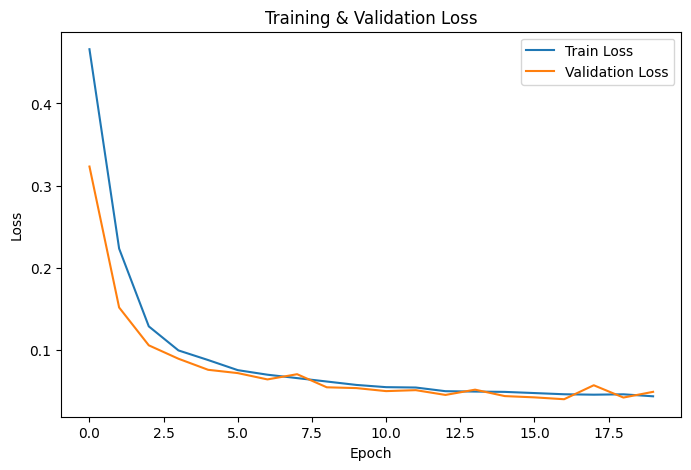


Evaluation: RNN
 Classification Report for RNN 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1033
         1.0       0.99      0.93      0.96       374

    accuracy                           0.98      1407
   macro avg       0.98      0.96      0.97      1407
weighted avg       0.98      0.98      0.98      1407



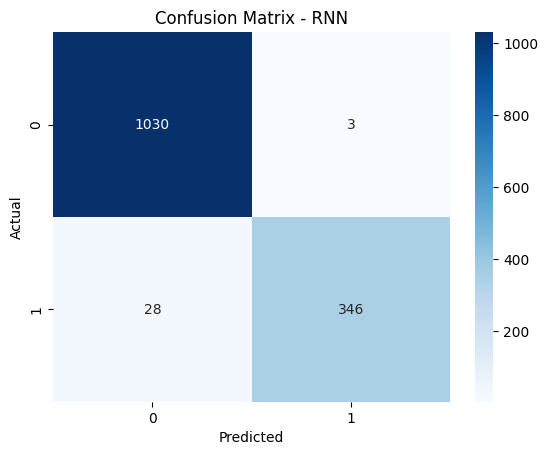

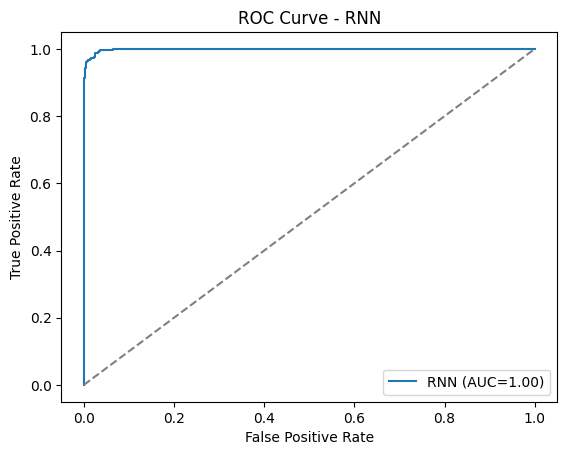


===== Training LSTM =====


/opt/anaconda3/envs/telco_churn/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


Epoch 1/20, Train Loss: 0.5096, Val Loss: 0.4210
Epoch 2/20, Train Loss: 0.3154, Val Loss: 0.2016
Epoch 3/20, Train Loss: 0.1485, Val Loss: 0.1034
Epoch 4/20, Train Loss: 0.0967, Val Loss: 0.0841
Epoch 5/20, Train Loss: 0.0809, Val Loss: 0.0694
Epoch 6/20, Train Loss: 0.0696, Val Loss: 0.0590
Epoch 7/20, Train Loss: 0.0612, Val Loss: 0.0491
Epoch 8/20, Train Loss: 0.0541, Val Loss: 0.0486
Epoch 9/20, Train Loss: 0.0494, Val Loss: 0.0447
Epoch 10/20, Train Loss: 0.0485, Val Loss: 0.0449
Epoch 11/20, Train Loss: 0.0468, Val Loss: 0.0445
Epoch 12/20, Train Loss: 0.0454, Val Loss: 0.0398
Epoch 13/20, Train Loss: 0.0418, Val Loss: 0.0367
Epoch 14/20, Train Loss: 0.0422, Val Loss: 0.0392
Epoch 15/20, Train Loss: 0.0425, Val Loss: 0.0361
Epoch 16/20, Train Loss: 0.0428, Val Loss: 0.0385
Epoch 17/20, Train Loss: 0.0401, Val Loss: 0.0342
Epoch 18/20, Train Loss: 0.0399, Val Loss: 0.0353
Epoch 19/20, Train Loss: 0.0392, Val Loss: 0.0355
Epoch 20/20, Train Loss: 0.0389, Val Loss: 0.0386


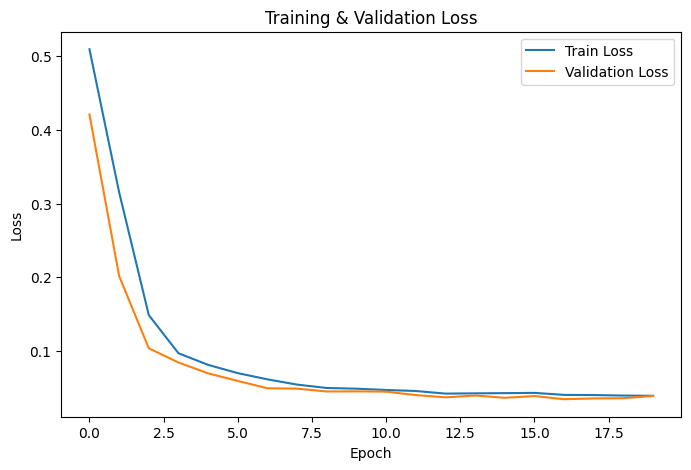


Evaluation: LSTM
 Classification Report for LSTM 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1033
         1.0       0.99      0.94      0.97       374

    accuracy                           0.98      1407
   macro avg       0.99      0.97      0.98      1407
weighted avg       0.98      0.98      0.98      1407



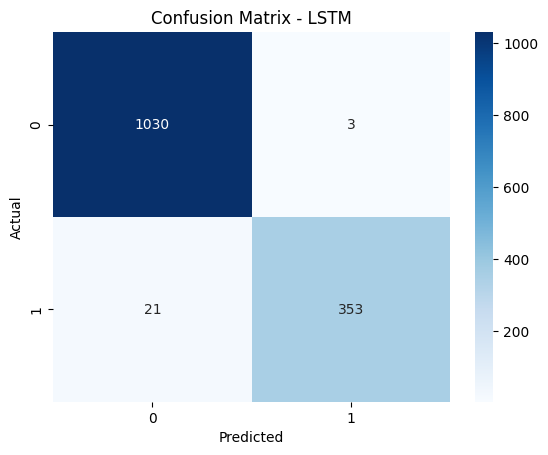

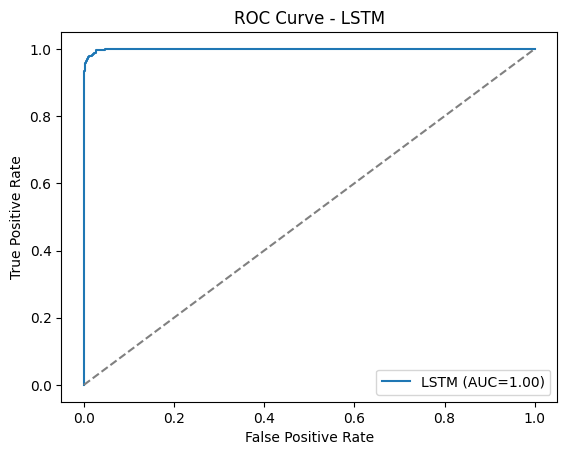


===== Training Transformer =====


/opt/anaconda3/envs/telco_churn/lib/python3.10/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 1/20, Train Loss: 0.5171, Val Loss: 0.4904
Epoch 2/20, Train Loss: 0.4372, Val Loss: 0.3609
Epoch 3/20, Train Loss: 0.2984, Val Loss: 0.2826
Epoch 4/20, Train Loss: 0.2274, Val Loss: 0.2832
Epoch 5/20, Train Loss: 0.1838, Val Loss: 0.1645
Epoch 6/20, Train Loss: 0.1702, Val Loss: 0.1526
Epoch 7/20, Train Loss: 0.1484, Val Loss: 0.1764
Epoch 8/20, Train Loss: 0.1411, Val Loss: 0.1268
Epoch 9/20, Train Loss: 0.1378, Val Loss: 0.1492
Epoch 10/20, Train Loss: 0.1385, Val Loss: 0.1248
Epoch 11/20, Train Loss: 0.1342, Val Loss: 0.1214
Epoch 12/20, Train Loss: 0.1337, Val Loss: 0.1164
Epoch 13/20, Train Loss: 0.1349, Val Loss: 0.1417
Epoch 14/20, Train Loss: 0.1309, Val Loss: 0.1297
Epoch 15/20, Train Loss: 0.1271, Val Loss: 0.1127
Epoch 16/20, Train Loss: 0.1195, Val Loss: 0.1105
Epoch 17/20, Train Loss: 0.1239, Val Loss: 0.1079
Epoch 18/20, Train Loss: 0.1178, Val Loss: 0.1129
Epoch 19/20, Train Loss: 0.1224, Val Loss: 0.1006
Epoch 20/20, Train Loss: 0.1151, Val Loss: 0.0898


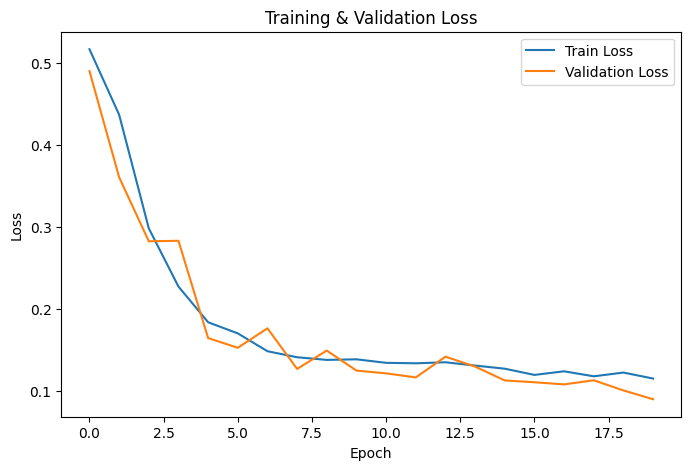


Evaluation: Transformer
 Classification Report for Transformer 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1033
         1.0       0.95      0.93      0.94       374

    accuracy                           0.97      1407
   macro avg       0.96      0.96      0.96      1407
weighted avg       0.97      0.97      0.97      1407



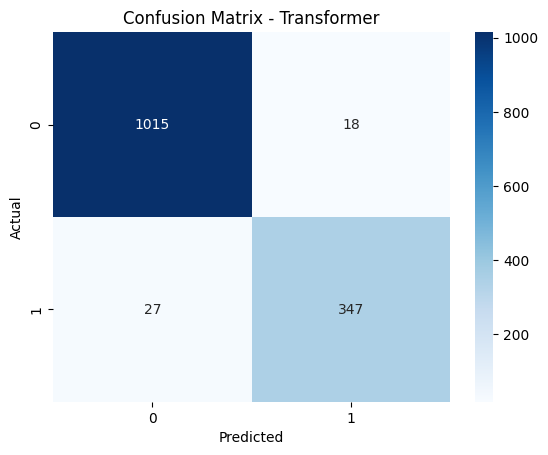

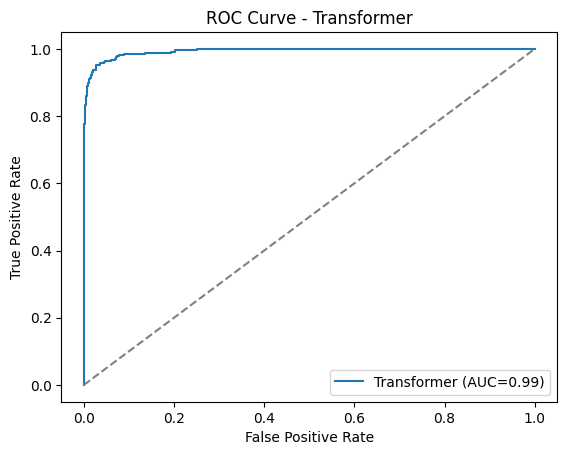

In [4]:
results = {}

# 1. RNN
print("\n===== Training RNN =====")
rnn_model = RNNChurn(input_dim=input_dim).to(device)
rnn_model = train_model_seq(rnn_model, train_loader, test_loader,
                            epochs=20, lr=0.001, device=device)
print("\nEvaluation: RNN")
auc_rnn = evaluate_seq(rnn_model, test_loader, device, model_name="RNN")
results["RNN"] = auc_rnn

# 2. LSTM
print("\n===== Training LSTM =====")
lstm_model = LSTMChurn(input_dim=input_dim).to(device)
lstm_model = train_model_seq(lstm_model, train_loader, test_loader,
                             epochs=20, lr=0.001, device=device)

print("\nEvaluation: LSTM")
auc_lstm = evaluate_seq(lstm_model, test_loader, device, model_name="LSTM")
results["LSTM"] = auc_lstm

# 3. Transformer
print("\n===== Training Transformer =====")
transformer_model = TransformerChurn(input_dim=input_dim).to(device)
transformer_model = train_model_seq(transformer_model, train_loader, test_loader,
                                    epochs=20, lr=0.001, device=device)

print("\nEvaluation: Transformer")
auc_transformer = evaluate_seq(transformer_model, test_loader, device, model_name="Transformer")
results["Transformer"] = auc_transformer


# 4. Compare AUCs

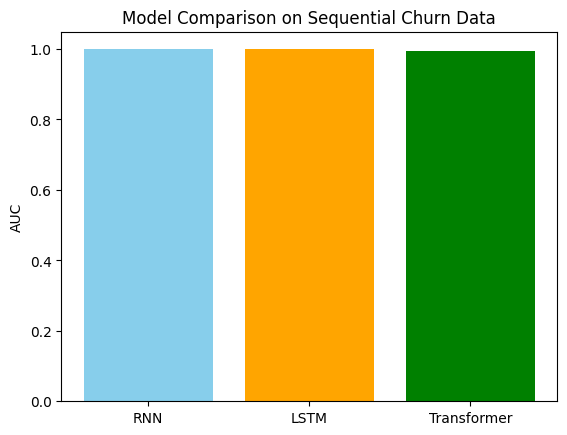

Final AUC Scores: {'RNN': 0.9988559359324123, 'LSTM': 0.9991846602233255, 'Transformer': 0.9931640877771508}


In [5]:
plt.bar(results.keys(), results.values(), color=["skyblue","orange","green"])
plt.ylabel("AUC")
plt.title("Model Comparison on Sequential Churn Data")
plt.show()

print("Final AUC Scores:", results)


## 5. Model Comparison and Insights

### Key Results
- **RNN** and **LSTM** achieved **very high performance**, with accuracy ~98% and AUC values close to **1.0**.  
- **Transformer** initially underperformed due to overfitting and unstable validation loss. However, after applying **regularization strategies** (dropout, L2 weight decay, layer normalization, and Gaussian noise injection), the model improved significantly, reaching an AUC of **0.993** — close to RNN and LSTM.  
- All models showed strong **precision and recall** for both churn (class 1) and non-churn (class 0). LSTM slightly outperformed RNN in recall for the churn class.

### Observations
- **RNN** and **LSTM** are well-suited for sequential churn data due to their ability to capture temporal dependencies effectively.  
- **LSTM** provided a marginal improvement over RNN, especially in recall for churned customers, confirming its strength in handling longer-term dependencies.  
- **Transformer**, while more flexible and parallelizable, required **careful tuning and regularization** to generalize well. Without these, it tended to overfit, as shown by higher validation loss.

### Takeaways
1. **LSTM remains the strongest baseline** for this type of sequential churn prediction.  
2. **RNN** is simpler and performs nearly as well, making it a competitive alternative with lower complexity.  
3. **Transformer models**, although more powerful in theory, require larger datasets and stronger regularization to unlock their full potential in this context.  
4. Incorporating **regularization hacks** (dropout, L2 penalty, layer norm, noise injection) significantly stabilized Transformer training and narrowed the performance gap.  

Overall, **RNN and LSTM dominate in this dataset**, but Transformer performance shows promise, especially with further tuning or scaling to larger real-world datasets.


